<img src="../../../../imgs/CampQMIND_banner.png">

# Microsoft's LightGBM

LightGBM is a gradient boosted machine learning library by Microsoft. It is prefered among its competitiors for its speed. For most use-cases it provides higher performance than other gradient boosting implementations .

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Microsoft's-LightGBM" data-toc-modified-id="Microsoft's-LightGBM-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Microsoft's LightGBM</a></span></li><li><span><a href="#Installing-the-package" data-toc-modified-id="Installing-the-package-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Installing the package</a></span></li><li><span><a href="#Standard-Usage" data-toc-modified-id="Standard-Usage-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Standard Usage</a></span></li><li><span><a href="#Sample-Grid-Search" data-toc-modified-id="Sample-Grid-Search-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Sample Grid Search</a></span></li><li><span><a href="#Worked-Example" data-toc-modified-id="Worked-Example-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Worked Example</a></span></li><li><span><a href="#Resources" data-toc-modified-id="Resources-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Resources</a></span></li></ul></div>

# Installing the package

Standard installization:

``` python
!pip install lightgbm
```


To be able to use the gpu implementation:
``` python
!pip install lightgbm --install-option=--gpu
```

# Standard Usage
``` python
import lightgbm as lgb
```

# Sample Grid Search

```python
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'categorical_feature': 'auto',
           'is_unbalance':True}

clf = lgb.LGBMClassifier(max_depth=-1, random_state=0, silent=True, metric='None', n_jobs=4, n_estimators=5000)
grid = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=100,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

grid.fit(X_train,y_train,**fit_params)
```

source: https://www.kaggle.com/mlisovyi/lightgbm-hyperparameter-optimisation-lb-0-761

# Worked Example

In [14]:
import numpy as np 
import pandas as pd

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [15]:
df = pd.read_csv("train.csv",index_col=0)

In [16]:
# LightGBM does deal with categorical variables but only if they are a "category" data type
X = df.drop(["target"],axis=1)
y = df.target
for col in X.select_dtypes("O"):
    X[col] = X[col].astype('category')
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [17]:
params = {'learning_rate': 0.05,
          'metric': 'auc',
          'n_jobs': -1,
          'n_estimators' : 1000,
          'feature_fraction_seed': 0,
          'bagging_seed': 0,
          'boosting_type': 'gbdt',
          'verbose': 1,
          'is_unbalance': True}
params_grid = {'colsample_bytree': 0.6377497065362651, 'min_child_samples': 323, 'min_child_weight': 0.1, 'num_leaves': 10, 'reg_alpha': 100, 'reg_lambda': 0.1, 'subsample': 0.9071147321063562}
model = lgb.LGBMClassifier(**params,**params_grid)

In [18]:
%%time
model.fit(X_train,y_train,eval_metric='AUC',eval_set = [(X_test, y_test)],
                  verbose = 1000,
                  early_stopping_rounds = 1000)

Training until validation scores don't improve for 1000 rounds
[1000]	valid_0's auc: 0.778523
Did not meet early stopping. Best iteration is:
[467]	valid_0's auc: 0.780791
CPU times: user 3min 4s, sys: 17.4 s, total: 3min 22s
Wall time: 39.2 s


LGBMClassifier(bagging_seed=0, boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.6377497065362651, feature_fraction_seed=0,
               importance_type='split', is_unbalance=True, learning_rate=0.05,
               max_depth=-1, metric='auc', min_child_samples=323,
               min_child_weight=0.1, min_split_gain=0.0, n_estimators=1000,
               n_jobs=-1, num_leaves=10, objective=None, random_state=None,
               reg_alpha=100, reg_lambda=0.1, silent=True,
               subsample=0.9071147321063562, subsample_for_bin=200000,
               subsample_freq=0, verbose=1)

In [19]:
preds = model.predict_proba(X_test)
roc_auc_score(y_test, preds[:,1])

0.7807908494965445

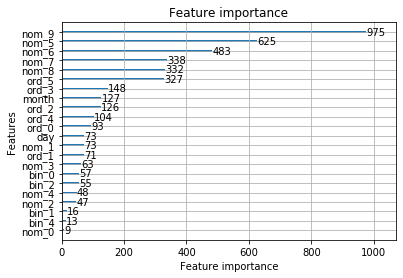

In [22]:
lgb.plot_importance(model)

# Resources
- https://www.youtube.com/watch?v=4pnlGZ7l67I - Transaction Fraud Detection using LightGBM Model | LightGBM Tutorial
- https://www.youtube.com/watch?v=V5158Oug4W8 - Topic 10. Part 2. Key ideas behind Xgboost, LightGBM, and CatBoost. Practice with LightGBM